<a href="https://colab.research.google.com/github/albertocj1/CCADMACL_EXERCISES_COM222/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)

In [2]:
target = housing.target

In [5]:
features = housing.data[["Longitude", "Latitude"]]

In [6]:
features.head()

,Longitude,Latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [8]:
df = pd.concat([features, target])
df

,Longitude,Latitude,MedHouseVal
0,-122.23,37.88,NaN
1,-122.22,37.86,NaN
2,-122.24,37.85,NaN
3,-122.25,37.85,NaN
4,-122.25,37.85,NaN
...,...,...,...
20635,NaN,NaN,0.781
20636,NaN,NaN,0.771
20637,NaN,NaN,0.923
20638,NaN,NaN,0.847


<Axes: xlabel='Longitude', ylabel='Latitude'>

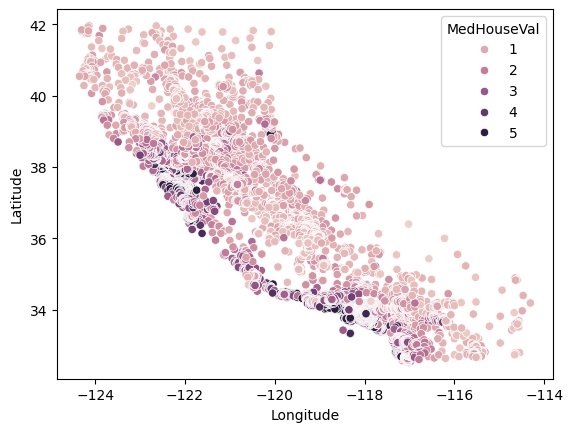

In [9]:
import seaborn as sns

sns.scatterplot(data = df, x = 'Longitude', y = 'Latitude', hue = 'MedHouseVal')

In [10]:
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)

<ipython-input-10-bd68fb26486c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
<ipython-input-10-bd68fb26486c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Latitude', 'Longitude']], df[['MedHouseVal']], test_size=0.33, random_state=0)

In [12]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='Longitude', ylabel='Latitude'>

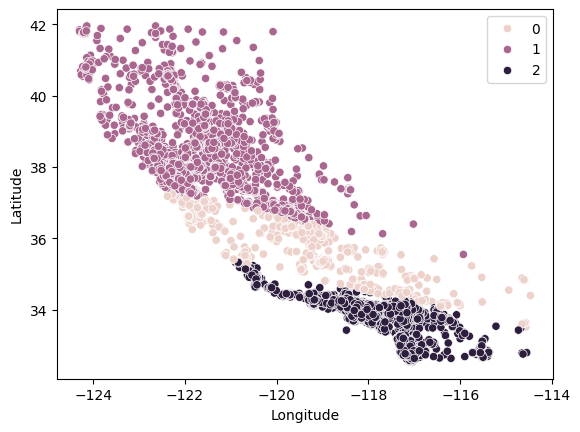

In [14]:
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)

## Use the Elbow method to find the correct value of K

For cluster = 1, SSE/WCSS is 2.0690172605159725
For cluster = 2, SSE/WCSS is 0.8284273171163479
For cluster = 3, SSE/WCSS is 0.2896383867598299
For cluster = 4, SSE/WCSS is 0.132747199063285
For cluster = 5, SSE/WCSS is 0.08993069099852923
For cluster = 6, SSE/WCSS is 0.0546819256900248
For cluster = 7, SSE/WCSS is 0.04024303237480054
For cluster = 8, SSE/WCSS is 0.031246461538058726
For cluster = 9, SSE/WCSS is 0.025368883173397708
For cluster = 10, SSE/WCSS is 0.02021788410079479


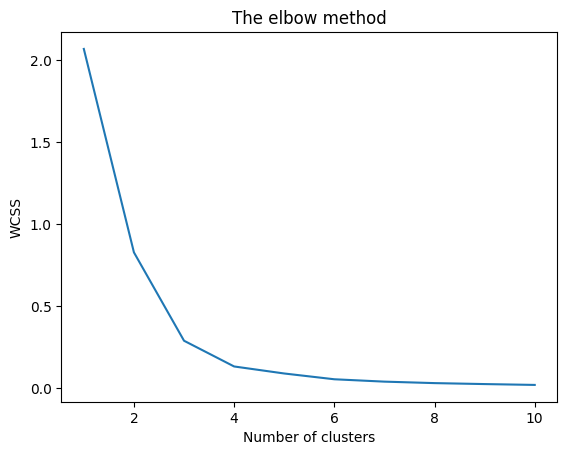

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X_train_norm is already defined
wcss = []
sse = {}  # Initialize the dictionary

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train_norm)
    wcss.append(kmeans.inertia_)
    sse[i] = kmeans.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


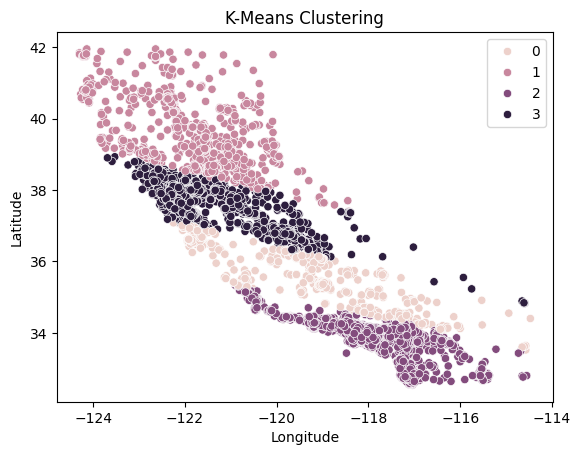

In [27]:
kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)
plt.title('K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [22]:
import numpy as np
from sklearn.cluster import KMeans

cluster_Kmeans = KMeans(n_clusters=3)
model_kmeans = cluster_Kmeans.fit(X_train_norm)
pred_kmeans = model_kmeans.labels_
print(pred_kmeans)

unique, counts = np.unique(pred_kmeans, return_counts=True)
print(dict(zip(unique, counts)))


[2 0 1 ... 0 0 2]
{0: 14897, 1: 5348, 2: 7412}


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


cluster_Kmeans = KMeans(n_clusters=4, random_state=42)
model_kmeans = cluster_Kmeans.fit(X_train_norm)  # Pass X_train_norm to fit
labels_1 = model_kmeans.labels_


print("Silhouette Score for 4 Clusters")
print(silhouette_score(X_train_norm, labels_1))
print('\n')


wcss = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, max_iter=100, random_state=42).fit(X_train_norm)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_train_norm, label, metric='euclidean')
    print(f'For cluster={k}, Silhouette Coefficient is {sil_coeff:.2f}')


Silhouette Score for 4 Clusters
0.7966989662916839


For cluster=2, Silhouette Coefficient is 0.65
For cluster=3, Silhouette Coefficient is 0.80
For cluster=4, Silhouette Coefficient is 0.80
For cluster=5, Silhouette Coefficient is 0.83
For cluster=6, Silhouette Coefficient is 0.79
For cluster=7, Silhouette Coefficient is 0.79
For cluster=8, Silhouette Coefficient is 0.78
For cluster=9, Silhouette Coefficient is 0.78
For cluster=10, Silhouette Coefficient is 0.78
For cluster=11, Silhouette Coefficient is 0.78
For cluster=12, Silhouette Coefficient is 0.78
For cluster=13, Silhouette Coefficient is 0.78
For cluster=14, Silhouette Coefficient is 0.78
For cluster=15, Silhouette Coefficient is 0.79
For cluster=16, Silhouette Coefficient is 0.79
For cluster=17, Silhouette Coefficient is 0.79
For cluster=18, Silhouette Coefficient is 0.79
For cluster=19, Silhouette Coefficient is 0.79
